## Comparing Two Survival Distributions

In [3]:
sixmp = read.table("sixmp.txt")
head(sixmp)

pairid,tpbo,t6mp,irelapse
1,1,10,1
2,22,7,1
3,3,32,0
4,12,23,1
5,8,22,1
6,17,6,1


In [6]:
sixmpLong = cbind(rep(sixmp$pairid, 2), c(sixmp$tpbo, sixmp$t6mp), rep(0:1, each = 21), c(rep(1,21), sixmp$irelapse))
sixmpLong = as.data.frame(sixmpLong)
names(sixmpLong) = c("pairid", "time", "sixmp", "irelapse")
head(sixmpLong)

pairid,time,sixmp,irelapse
1,1,0,1
2,22,0,1
3,3,0,1
4,12,0,1
5,8,0,1
6,17,0,1


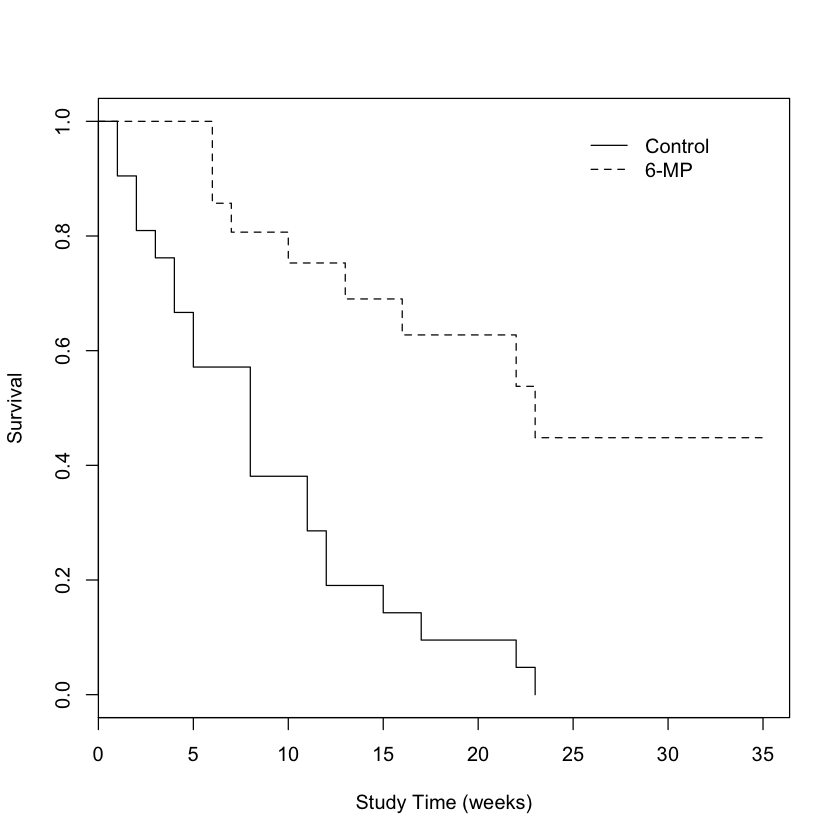

In [9]:
library(ggplot2)
library(survival)
library(KMsurv)

plot(survfit(Surv(time, irelapse) ~ sixmp, data = sixmpLong), lty = 1:2, 
             xlab = "Study Time (weeks)", ylab = "Survival" )

legend(25, 1, lty = 1:2, legend = c("Control", "6-MP"), bty = "n")

In [10]:
survdiff(Surv(time, irelapse) ~ sixmp, data = sixmpLong)

Call:
survdiff(formula = Surv(time, irelapse) ~ sixmp, data = sixmpLong)

         N Observed Expected (O-E)^2/E (O-E)^2/V
sixmp=0 21       21     10.7      9.77      16.8
sixmp=1 21        9     19.3      5.46      16.8

 Chisq= 16.8  on 1 degrees of freedom, p= 4.17e-05 

# Weighted Logrank Tests

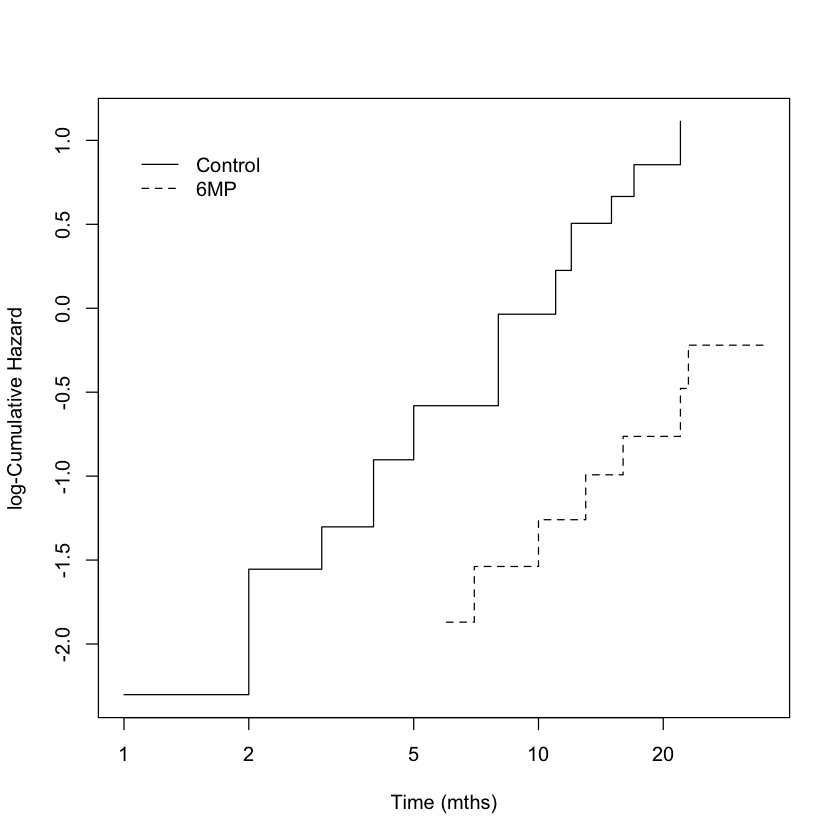

In [11]:
plot(survfit(Surv(time, irelapse) ~ sixmp, data = sixmpLong), fun = "cloglog", lty = 1:2, mark.time = FALSE,
     xlab = "Time (mths)", ylab = "log-Cumulative Hazard")

legend(1,1,lty = 1:2, legend = c("Control", "6MP"), bty = "n")

In [14]:
cat("Usual (unweight LR test)")
survdiff(Surv(time, irelapse) ~ sixmp,  rho = 0, data = sixmpLong)

Usual (unweight LR test)

Call:
survdiff(formula = Surv(time, irelapse) ~ sixmp, data = sixmpLong, 
    rho = 0)

         N Observed Expected (O-E)^2/E (O-E)^2/V
sixmp=0 21       21     10.7      9.77      16.8
sixmp=1 21        9     19.3      5.46      16.8

 Chisq= 16.8  on 1 degrees of freedom, p= 4.17e-05 

In [15]:
cat("Generalized Wilcoxon Test")
survdiff(Surv(time, irelapse) ~ sixmp,  rho = 1, data = sixmpLong)

Generalized Wilcoxon Test

Call:
survdiff(formula = Surv(time, irelapse) ~ sixmp, data = sixmpLong, 
    rho = 1)

         N Observed Expected (O-E)^2/E (O-E)^2/V
sixmp=0 21    14.55     7.68      6.16      14.5
sixmp=1 21     5.12    12.00      3.94      14.5

 Chisq= 14.5  on 1 degrees of freedom, p= 0.000143 

# K-Sample Logrank Tests

In [17]:
larynx = read.table("larynx.txt")


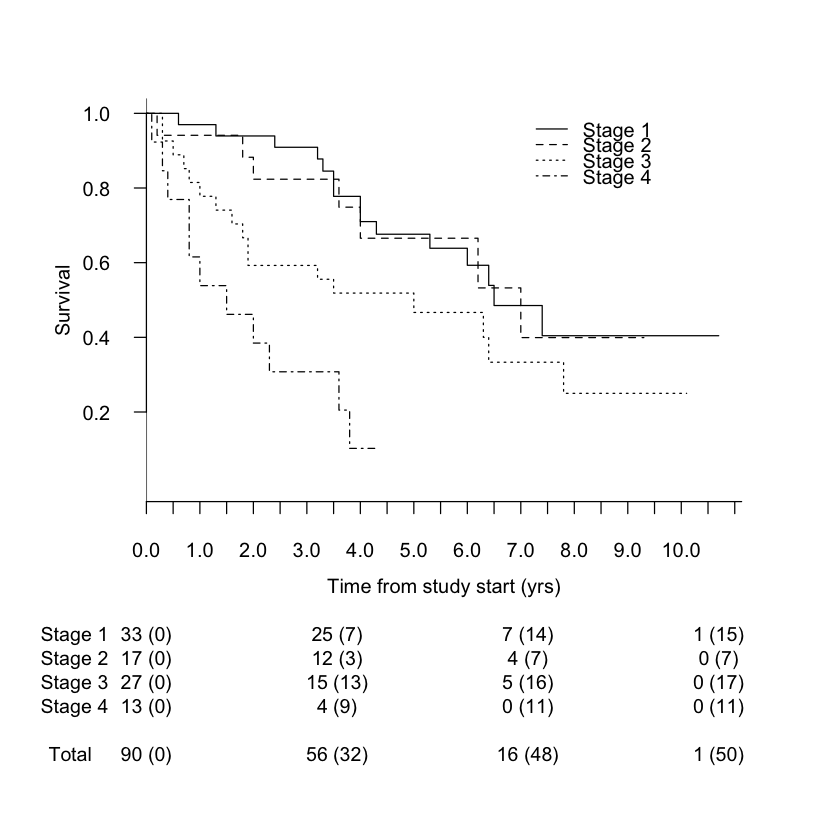

In [25]:
source("Stat255Functions.R")
kmPlot(survfit(Surv(t2death, death) ~ stage, data = larynx), xscale = 1, groupLabels = paste("Stage", 1:4),
       cex = 1.4, ymarOffset = 8)
legend(7,1, lty = 1:4, legend = paste("Stage", 1:4), bty = "n", cex = 1)


In [26]:
survdiff(Surv(t2death, death) ~ stage, data = larynx)

Call:
survdiff(formula = Surv(t2death, death) ~ stage, data = larynx)

         N Observed Expected (O-E)^2/E (O-E)^2/V
stage=1 33       15    22.57     2.537     4.741
stage=2 17        7    10.01     0.906     1.152
stage=3 27       17    14.08     0.603     0.856
stage=4 13       11     3.34    17.590    19.827

 Chisq= 22.8  on 3 degrees of freedom, p= 4.53e-05 

# K-sample (Tarone) Test for Trend

In [27]:
survtrend <- function( formula, data, print.table=TRUE ){
	lrfit <- survdiff( formula, data=data )
	df <- length( lrfit$n ) - 1
	score <- coxph( formula, data=data )$score
	if( print.table ){
		oetable <- cbind( lrfit$n, lrfit$obs, lrfit$exp )
		colnames(oetable) <- c("N", "Observed", "Expected" )
		print( oetable )
		}
	cat( "\nLogrank Test : Chi(", df, ") = ", lrfit$chisq, ", p-value = ", 1-pchisq(lrfit$chisq, df), sep="" )
	cat( "\nTarone Test Trend : Chi(1) = ", score, ", p-value = ", 1-pchisq(score, 1), sep="" )
	}
	
survtrend( Surv(t2death,death) ~ stage, data=larynx )

         N Observed  Expected
stage=1 33       15 22.566040
stage=2 17        7 10.011697
stage=3 27       17 14.084548
stage=4 13       11  3.337715

Logrank Test : Chi(3) = 22.76276, p-value = 4.525211e-05
Tarone Test Trend : Chi(1) = 13.81529, p-value = 0.0002016886

# Stratified Logrank Tests

In [29]:
##
#####	Consider potential confounding by age with a stratified LR test
##
summary(larynx$age)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  41.00   57.00   65.00   64.61   72.00   86.00 

In [30]:
round( quantile( larynx$age, c(0,.33,.66,1) ) )
larynx$agegrp <- cut( larynx$age, c(41,60,70,86), include.lowest=TRUE )
summary( larynx$agegrp )



0%  33%  66% 100% 
  41   60   70   86

[41,60] (60,70] (70,86] 
     30      32      28

In [31]:
##
##### Does age meet the definition of a confounder? (not really...)
##
chisq.test( table( larynx$stage, larynx$agegrp ) )
survdiff( Surv(t2death,death) ~ agegrp, data=larynx )



Warning message in chisq.test(table(larynx$stage, larynx$agegrp)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(larynx$stage, larynx$agegrp)
X-squared = 4.7134, df = 6, p-value = 0.5811


Call:
survdiff(formula = Surv(t2death, death) ~ agegrp, data = larynx)

                N Observed Expected (O-E)^2/E (O-E)^2/V
agegrp=[41,60] 30       14     15.9     0.221      0.33
agegrp=(60,70] 32       16     20.8     1.103      1.94
agegrp=(70,86] 28       20     13.3     3.325      4.62

 Chisq= 4.7  on 2 degrees of freedom, p= 0.0937 

In [32]:
##
#####	LR test of association between stage and t2death, stratified by agegrp
##
survdiff( Surv(t2death,death) ~ stage + strata(agegrp), data=larynx )

Call:
survdiff(formula = Surv(t2death, death) ~ stage + strata(agegrp), 
    data = larynx)

         N Observed Expected (O-E)^2/E (O-E)^2/V
stage=1 33       15    23.60     3.134     6.430
stage=2 17        7     9.38     0.602     0.763
stage=3 27       17    13.23     1.074     1.547
stage=4 13       11     3.79    13.686    16.182

 Chisq= 20.1  on 3 degrees of freedom, p= 0.00016 

# Matched Tests

In [33]:

##
#####
#####	Matched analysis of the 6-MP data
#####
##
sixmp <- read.table( "http://www.ics.uci.edu/~dgillen/STAT255/Data/sixmp.txt" )
sixmp[1:5,]

pairid,tpbo,t6mp,irelapse
1,1,10,1
2,22,7,1
3,3,32,0
4,12,23,1
5,8,22,1


In [35]:
##
#####
#####	Transform data to long format
#####
##
sixmpLong <- cbind(rep(sixmp$pairid, 2), c( sixmp$tpbo, sixmp$t6mp ), rep(0:1, each=21), c( rep(1,21), sixmp$irelapse))
sixmpLong <- as.data.frame( sixmpLong )
names( sixmpLong ) <- c( "pairid", "time", "sixmp", "irelapse" ) 
sixmpLong[ c(1:5,22:26), ]

,pairid,time,sixmp,irelapse
1,1,1,0,1
2,2,22,0,1
3,3,3,0,1
4,4,12,0,1
5,5,8,0,1
22,1,10,1,1
23,2,7,1,1
24,3,32,1,0
25,4,23,1,1
26,5,22,1,1


In [40]:
##
#####	Matched analysis stratifying by pairid
##
survdiff( Surv( time, irelapse ) ~ sixmp + strata(pairid), data=sixmpLong )


Call:
survdiff(formula = Surv(time, irelapse) ~ sixmp + strata(pairid), 
    data = sixmpLong)

         N Observed Expected (O-E)^2/E (O-E)^2/V
sixmp=0 21       21     13.5      4.17      10.7
sixmp=1 21        9     16.5      3.41      10.7

 Chisq= 10.7  on 1 degrees of freedom, p= 0.00106 